In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

**Importing Libraries**

In [3]:
#importing pandas
#PANDAS:Pandas is used  for data manipulation and analysis
import pandas as pd

#importing NumPy
#NumPy: NumPy is used for Scientific calcualtions performing mostly on large, multi-dimensional arrays and matrices
import numpy as np

#importing Matplotlib
#Matplotlib: Matplotlib is used for plotting the graphs
import matplotlib.pyplot as plt

#importing Seaborn 
#Seaborn is used for data visualization library based on matplotlib
import seaborn as sns

#impoting Garbage Collector interface
import gc

In [4]:
#importing Classification Algorithm
from sklearn.linear_model import LogisticRegression

#importing StratifiedKFold
#StratifiedKFold : This cross-validation object is a variation of KFold that returns stratified folds
from sklearn.model_selection import StratifiedKFold

#Importing feature extraction algorithms
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

#importing decomposition algorithms
#TruncatedSVD : This transformer performs linear dimensionality reduction by means of truncated singular value decomposition
from sklearn.decomposition import TruncatedSVD

#importing Accuracy Classsification Score
from sklearn.metrics import log_loss,confusion_matrix,classification_report,roc_curve,auc

In [5]:
import string

#importing Natural Language Toolkit
import nltk

#In natural language processing, useless words (data), are referred to as stop words.
from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize
from scipy import sparse
%matplotlib inline
seed = 42
import os
os.environ['OMP_NUM_THREADS'] = '4'

In [14]:
#path = '../input/'
#train = pd.read_csv(path+'train.csv')
train = pd.read_csv('train.csv')
#test = pd.read_csv(path+'test.csv')
Test = pd.read_csv('test.csv')
print('Number of rows and columns in the train data set:',train.shape)
print('Number of rows and columns in the test data set:',Test.shape)
train.head()


Number of rows and columns in the train data set: (159571, 8)
Number of rows and columns in the test data set: (153164, 2)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [15]:
Test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [16]:
train.tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [17]:
Test.tail()

,id,comment_text
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."
153163,ffffce3fb183ee80,""" \n :::Stop already. Your bullshit is not wel..."


***Target varaible distribution***

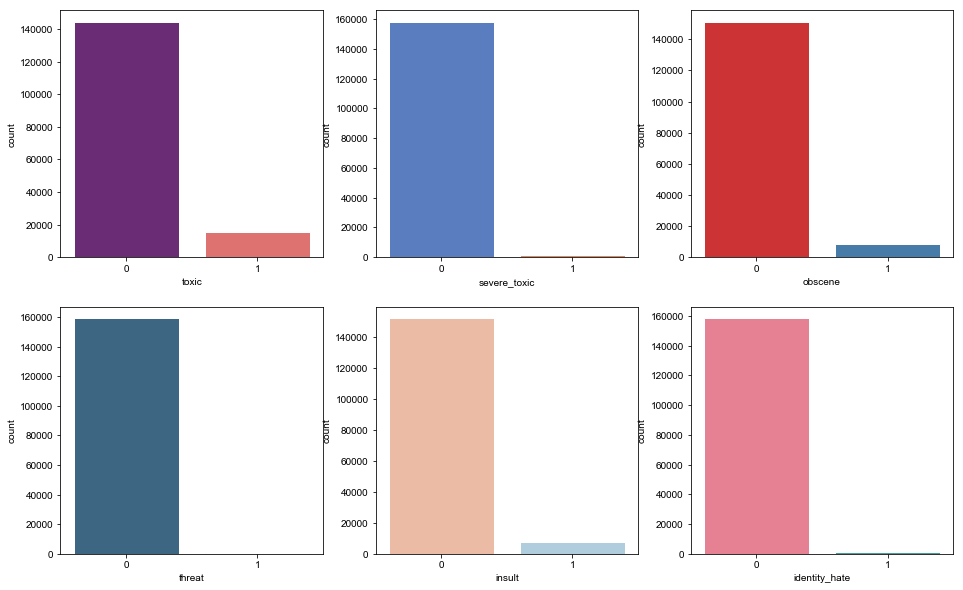

In [18]:
fig,ax = plt.subplots(2,3,figsize=(16,10))

#we may easily plot to all axes in a single loop.
ax1,ax2,ax3,ax4,ax5,ax6 = ax.flatten()

sns.set(style="darkgrid")

#Show the counts of observations in each categorical bin using bars.
sns.countplot(train['toxic'],palette= 'magma',ax=ax1)
sns.countplot(train['severe_toxic'], palette= 'muted',ax=ax2)
sns.countplot(train['obscene'], palette= 'Set1',ax=ax3)
sns.countplot(train['threat'], palette= 'viridis',ax = ax4)
sns.countplot(train['insult'], palette = 'RdBu',ax=ax5)
sns.countplot(train['identity_hate'], palette = 'husl', ax = ax6)

**Handling with Missing Values**

In [20]:
c = pd.DataFrame()
c['train'] = train.isnull().sum()
c['Test'] = Test.isnull().sum()
c

,train,Test
id,0,0.0
comment_text,0,0.0
toxic,0,NaN
severe_toxic,0,NaN
obscene,0,NaN
threat,0,NaN
insult,0,NaN
identity_hate,0,NaN


In [21]:
Test[Test['comment_text'].isnull()]

,id,comment_text


In [22]:
Test.fillna(' ',inplace=True)
gc.collect()


175

**TEXT PREPROCESSING**

*Term Frequency Inverse Document Frequency Vectorizer*

In [23]:
#TfidfVectorizer - Transforms text to feature vectors that can be used as input to estimator.
vect_word = TfidfVectorizer(max_features=20000, lowercase=True, analyzer='word',
                        stop_words= 'english',ngram_range=(1,3),dtype=np.float32)
vect_char = TfidfVectorizer(max_features=40000, lowercase=True, analyzer='char',
                        stop_words= 'english',ngram_range=(3,6),dtype=np.float32)

In [24]:
# Word ngram vector
tr_vect = vect_word.fit_transform(train['comment_text'])
ts_vect = vect_word.transform(Test['comment_text'])

# Character n gram vector
tr_vect_char = vect_char.fit_transform(train['comment_text'])
ts_vect_char = vect_char.transform(Test['comment_text'])
gc.collect()

0

In [25]:
#Stack sparse matrices horizontally 
X = sparse.hstack([tr_vect, tr_vect_char])
x_test = sparse.hstack([ts_vect, ts_vect_char])

In [26]:
target_col = ['toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate']
y = train[target_col]
del tr_vect, ts_vect, tr_vect_char, ts_vect_char
gc.collect()

40

**Model**

In [27]:
prd = np.zeros((x_test.shape[0],y.shape[1]))
cv_score =[]
for i,col in enumerate(target_col):
    lr = LogisticRegression(C=2,random_state = i,class_weight = 'balanced')
    print('Building {} model for column:{''}'.format(i,col)) 
    lr.fit(X,y[col])
    #cv_score.append(lr.score)
    prd[:,i] = lr.predict_proba(x_test)[:,1]

Building 0 model for column:toxic


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Building 1 model for column:severe_toxic
Building 2 model for column:obscene
Building 3 model for column:threat
Building 4 model for column:insult
Building 5 model for column:identity_hate


**Model Validation on train dataset**

In [28]:
col = 'identity_hate'
print("Column:",col)
pred =  lr.predict(X)
print('\nConfusion matrix\n',confusion_matrix(y[col],pred))
print(classification_report(y[col],pred))

Column: identity_hate

Confusion matrix
 [[156427   1739]
 [     0   1405]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    158166
           1       0.45      1.00      0.62      1405

   micro avg       0.99      0.99      0.99    159571
   macro avg       0.72      0.99      0.81    159571
weighted avg       1.00      0.99      0.99    159571



*Roc AUC Curve*

Column: identity_hate


Text(0.5, 1.0, 'Reciever Operating Characteristic')

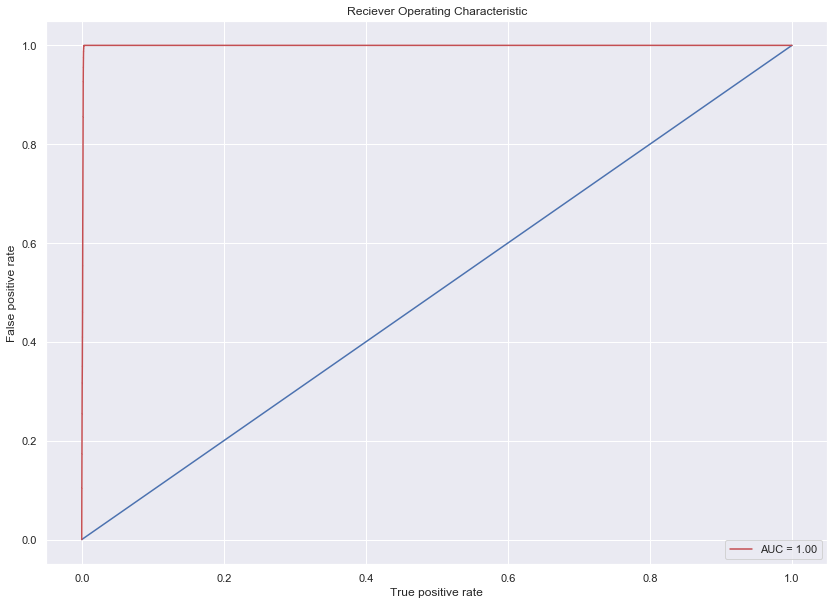

In [29]:
col = 'identity_hate'
print("Column:",col)
pred_pro = lr.predict_proba(X)[:,1]
frp,trp,thres = roc_curve(y[col],pred_pro)
auc_val =auc(frp,trp)
plt.figure(figsize=(14,10))
plt.plot([0,1],[0,1],color='b')
plt.plot(frp,trp,color='r',label= 'AUC = %.2f'%auc_val)
plt.legend(loc='lower right')
plt.xlabel('True positive rate')
plt.ylabel('False positive rate')
plt.title('Reciever Operating Characteristic')